In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import matplotx as pltx
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


# Ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

plt.ion()   # interactive mode




# training data
# training data loader

# testing data
# testing data loader

In [169]:
directory = 'cs156b\cs156b_train_data_small' # change if necessary
csv_file = pd.read_csv('cs156b/train2023.csv') # csv_file = pd.read_csv('train2023.csv')

df = csv_file

y_cols = ['No Finding', 'Enlarged Cardiomediastinum', 
            'Cardiomegaly', 'Lung Opacity', 'Pneumonia', 
            'Pleural Effusion', 'Pleural Other', 'Fracture', 
            'Support Devices']

# why are we doing this filling of NaN values to be 0?
csv_file[y_cols] = csv_file[y_cols].fillna(0)

# df.fillna(0, inplace=True)

Y = df[y_cols]

X = df["Path"]

print(X[:5],Y[:5])

0    train/pid50512/study1/view1_frontal.jpg
1    train/pid21580/study2/view1_frontal.jpg
2    train/pid21580/study1/view1_frontal.jpg
3    train/pid21580/study1/view2_lateral.jpg
4    train/pid33839/study1/view1_frontal.jpg
Name: Path, dtype: object    No Finding  Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity  \
0         1.0                         0.0           0.0           0.0   
1        -1.0                         0.0           0.0           1.0   
2        -1.0                         0.0           0.0           1.0   
3        -1.0                         0.0           0.0           1.0   
4        -1.0                         0.0           0.0           0.0   

   Pneumonia  Pleural Effusion  Pleural Other  Fracture  Support Devices  
0        0.0               0.0            0.0       0.0              1.0  
1        0.0               0.0            0.0       1.0              0.0  
2        0.0               0.0            0.0       1.0              0.0  
3        0

In [170]:
!  pip install imageio-ffmpeg

In [171]:

# https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
from PIL import Image
from torchvision.transforms import Compose, ToTensor, Resize

class CustomDataset(Dataset):
    """My custom chexpert dataset"""
    
    def __init__(self, csv_file, root_dir, transform=None):

        """
        Args:
            csv_file (string): Path to the CSV file with annotations.
            root_dir (string): Directory with all the images.
                defaults to /groups/CS156b/data
                where we have images in data/train and data/test
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = pd.read_csv(csv_file)
        # fil in NaN values with 0
        self.df[y_cols] = self.df[y_cols].fillna(0)
        
        # self.root_dir = root_dir
        # self.root_dir = "/groups/CS156b/data"
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

                   
        # I want to get a sample and the sample should be the Path that corresponds to the idx which is the first column
        row = self.df.iloc[idx]
        
        
        
        path = row['Path']
        path = path[6:]
        
        try:
            image_np = io.imread(os.path.join(self.root_dir, path), as_gray=True)
    
            # Apply transformations if needed
            if self.transform:
                image_pil = Image.fromarray(image_np)
                image_pil = self.transform(image_pil)
                image_np = np.array(image_pil)

            image = torch.tensor(image_np, dtype=torch.float32)

        except Exception as e:
            print("failed: ", e)
            # image is 224 x 224 in grayscale
            # to float tensor
            image = torch.zeros(1, 224, 224, dtype=torch.float32)
            
        # Convert labels to numpy array
        labels = row[y_cols].values
        
        labels = labels.astype(np.float32)


        # Convert numpy array to tensor, specifying the dtype as torch.float32
        labels = torch.tensor(labels, dtype=torch.float32)


            
        return image, labels




    

In [172]:
from tqdm import tqdm

In [173]:
# collect images that I have rn on my pc
# fixme this shouldn't matter for hpc but will need to remove code
idxs = []
for i in range(1, 101): ### for i in range(1, 501) ###
    # zfill for 5 digits
    stri = str(i).zfill(5)
    # print the idx of which "Path" has "pid{stri}"
    mask = df["Path"].fillna("").str.contains(f"pid{stri}")
    # print(f"pid{stri} is at index {df[mask].index}")
    for j in df[mask].index:
        idxs.append(j)
        
print(idxs)
len(idxs)

[77114, 19100, 19101, 19102, 19103, 19104, 19105, 19106, 19107, 19108, 19109, 19110, 19111, 19112, 122319, 122320, 168428, 168429, 7172, 7173, 7174, 103151, 103152, 103153, 103154, 103155, 103156, 103157, 103158, 79759, 168893, 168894, 52097, 6336, 98716, 28809, 28810, 28811, 28812, 28813, 28814, 28815, 28816, 28817, 28818, 28819, 28820, 28821, 28822, 28823, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 174776, 174804, 165827, 176296, 176297, 170162, 93740, 93741, 93742, 66918, 66919, 171439, 171440, 87347, 87348, 163371, 50912, 50913, 111526, 111527, 167092, 167093, 167094, 133211, 133212, 133213, 133214, 17019, 17020, 29367, 29368, 29369, 29370, 29371, 31935, 31936, 31937, 31938, 127189, 127190, 25064, 133829, 133830, 133831, 133832, 133833, 133834, 126652, 126653, 126654, 126655, 126656, 126657, 126658, 126659, 126660, 126661, 47482, 18185, 88165, 88166, 88167, 88168, 88169, 88170, 88171, 88172, 88173, 88174, 88175, 158785, 167336, 48698, 48699,

320

In [174]:
import torch.nn as nn
import torchvision
from torchvision.models import resnet18
from torchvision.models.resnet import ResNet18_Weights, BasicBlock


In [175]:

# customset = CustomDataset(csv_file='cs156b/train2023.csv', root_dir='cs156b/cs156b_train_data_small', )
from torchvision.transforms import Grayscale

# copilot
transformations = Compose([
    Grayscale(num_output_channels=1),
    Resize((224, 224)),
    ToTensor()
])

# Create the dataset with the transformations
# customset = CustomDataset(csv_file='train2023.csv', root_dir='cs156b_train_data_small', transform=transformations)
customset = CustomDataset(csv_file='cs156b/train2023.csv', root_dir='cs156b/cs156b_train_data_small', transform=transformations)

subset = torch.utils.data.Subset(customset, idxs)

train_size = int(0.8 * len(subset))
test_size = len(subset) - train_size
# in the meantime, while I don't have the whole set
train_dataset, test_dataset = torch.utils.data.random_split(subset, [train_size, test_size])

# set batch size
batch_size = 32

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


train_features, train_labels = next(iter(train_data_loader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# print(train_labels)


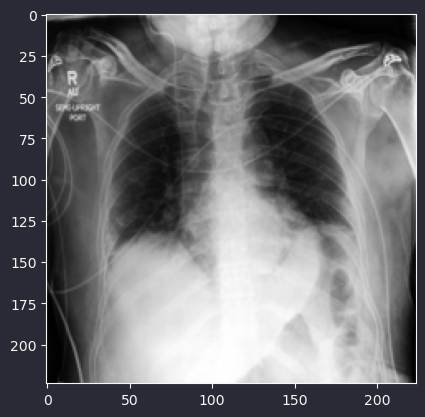

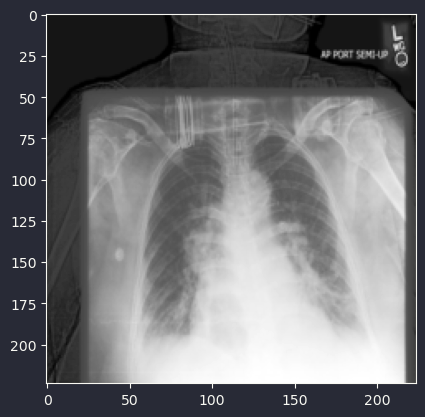

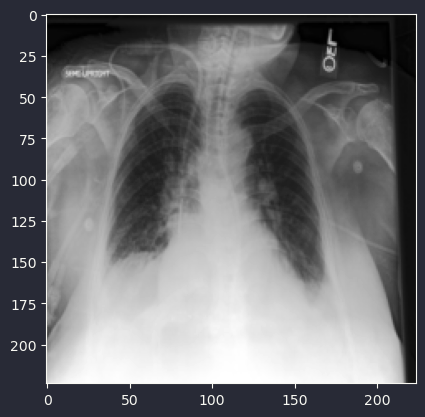

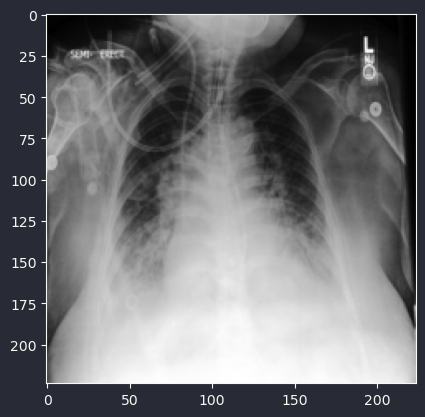

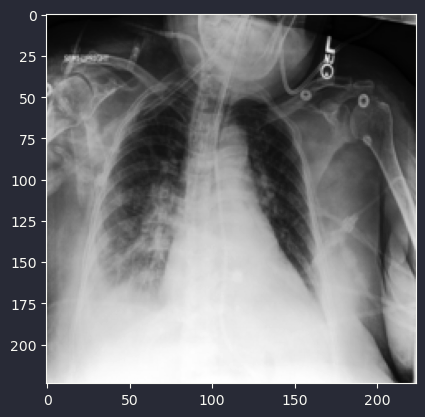

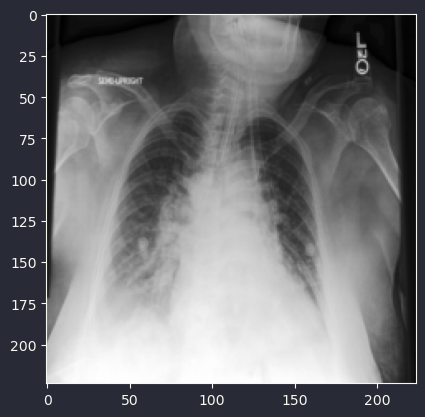

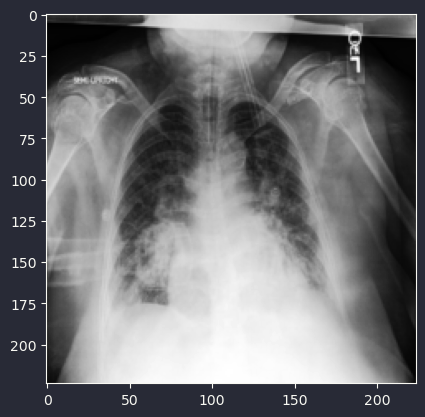

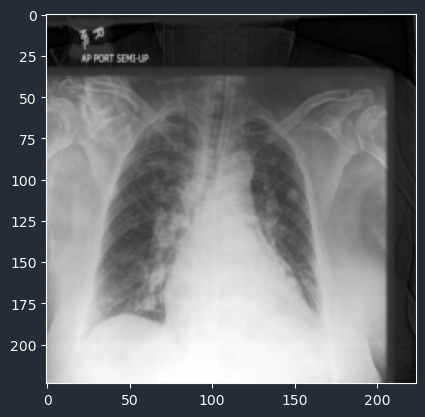

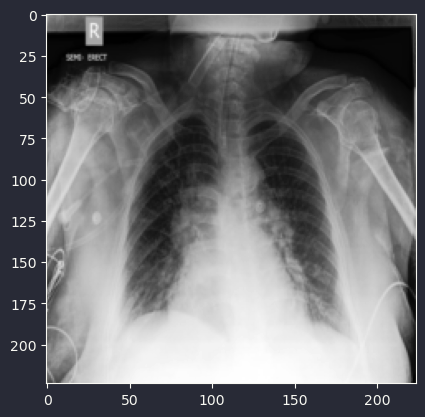

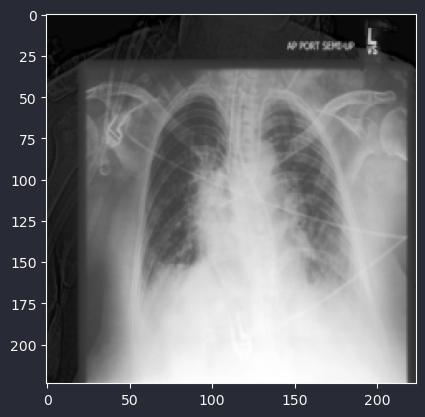

In [176]:
j = 0
for img, lab in subset:
    # show 10 imgs
    plt.imshow(img.squeeze(0), cmap='gray')
    plt.show()
    j += 1
    if j == 10:
        break

In [177]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchvision.transforms import Compose, ToTensor, Resize
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load pre-trained ResNet
model = models.resnet18(pretrained=True)

# Use CUDA if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Move the model to the CUDA device


# Change the first layer to accept grayscale images
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


# Change the number of output features of the last layer
num_classes = 9 
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the criterion to the CUDA device
model = model.to(device)
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

c:\Users\thang\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thang\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [178]:
# Assuming train_data_loader is your DataLoader for training data,
# and test_data_loader is your DataLoader for testing data

EPOCHS = 15

losses = []
losses2 = []

for _ in tqdm(range(EPOCHS)):
    # Train model and record training loss
    model.train()

    for images, labels in train_data_loader:
        # Move images and labels to the CUDA device
        images = images.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()

    losses.append(loss.item())

    # Test model and record validation loss
    model.eval()
    validation_loss = 0.0

    for images, labels in test_data_loader:
        # Move images and labels to the CUDA device
        images = images.cuda()
        labels = labels.cuda()
        output = model(images)
        loss = criterion(output, labels)

    losses2.append(loss.item())
    

100%|██████████| 25/25 [05:44<00:00, 13.78s/it]


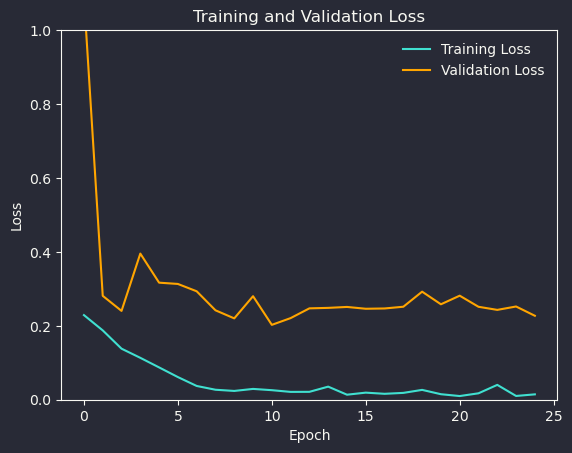

In [183]:
# Use stylesheet (Dracula)
plt.style.use(pltx.styles.dracula)

# Plot training loss
plt.plot(losses, label='Training Loss', color='turquoise')

# Plot validation loss
plt.plot(losses2, label='Validation Loss', color='orange')

# Stylize plot
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.0, 1.0)
plt.legend()
plt.savefig('losses.pdf')
plt.show()

In [180]:
# # evaluate on test_data printing side by side

# model.eval()

# losses2 = []

# for images, labels in test_data_loader:
#     images = images.cuda()
#     labels = labels.cuda()
#     output = model(images)
#     print("Predictions:")
#     print(output)
#     print("True labels:")
#     print(labels)
#     loss = criterion(output, labels)
    
    
#     losses2.append(loss.item())

# # plot validation loss
# plt.plot(losses2)



In [181]:
import csv

test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()

# Open the CSV file
with open("predictions.csv", "w") as f:
    writer = csv.writer(f)

    for images, labels in test_data_loader:
        images = images.cuda()
        output = model(images)
        # Convert the predictions to a numpy array and write them to the CSV file
        writer.writerows(output.cpu().detach().numpy())